In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori
import seaborn as sns
from tqdm import tqdm
from apyori import apriori as ap
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import fpmax
import time

In [2]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Milk', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs'],
           ['Corn', 'Kidney Beans'],
           ['Eggs', 'Yogurt' 'Apple',],
           ['Apple', '', 'Eggs'],
           ['Milk', 'Apple', 'Nutmeg', 'Eggs'],
           ['Kidney Beans', 'Dill', 'Corn', 'Nutmeg', 'Yogurt'],
           ['Dill', 'Onions', 'Eggs'],
           ['Corn', 'Milk', 'Nutmeg', 'Onion', 'Yogurt', 'Eggs']]

In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Onions,Unicorn,Yogurt,YogurtApple
0,False,False,False,False,True,False,True,True,True,True,False,False,True,False
1,False,False,False,True,True,False,True,False,True,True,False,False,True,False
2,False,True,False,False,True,False,True,True,False,False,False,False,False,False
3,False,False,True,False,False,False,True,True,False,False,False,True,True,False
4,False,False,True,False,True,True,True,True,False,True,False,False,False,False
5,False,False,True,False,False,False,True,False,False,False,False,False,False,False
6,False,False,False,False,True,False,False,False,False,False,False,False,False,True
7,True,True,False,False,True,False,False,False,False,False,False,False,False,False
8,False,True,False,False,True,False,False,True,True,False,False,False,False,False
9,False,False,True,True,False,False,True,False,True,False,False,False,True,False


In [4]:
apriori(df, min_support=0.1, use_colnames=False, max_len=None)

,support,itemsets
0,0.250000,(1)
1,0.416667,(2)
2,0.250000,(3)
3,0.750000,(4)
4,0.583333,(6)
...,...,...
75,0.250000,"(8, 9, 4, 12)"
76,0.166667,"(8, 9, 12, 6)"
77,0.166667,"(8, 9, 12, 7)"
78,0.166667,"(4, 6, 8, 9, 12)"


In [5]:
association_rules = ap(transactions = dataset, min_support=0.003, min_confidence=0.5, min_lift=3)
association_results = list(association_rules)

In [6]:
print(len(association_results))

85


In [7]:
start = time.time()
apriori(df, min_support=0.5, use_colnames=True, max_len=None)
end = time.time()

print("Time required", end - start)

Time required 0.0045201778411865234


[3.0994415283203125e-06, 1.9073486328125e-06, 1.1920928955078125e-06, 9.5367431640625e-07, 9.5367431640625e-07, 1.1920928955078125e-06, 9.5367431640625e-07, 7.152557373046875e-07, 9.5367431640625e-07, 1.1920928955078125e-06, 9.5367431640625e-07, 0.0, 0.0, 1.1920928955078125e-06, 9.5367431640625e-07, 9.5367431640625e-07, 9.5367431640625e-07, 1.1920928955078125e-06, 9.5367431640625e-07, 7.152557373046875e-07, 1.1920928955078125e-06, 0.0, 0.0, 0.0, 9.5367431640625e-07, 1.1920928955078125e-06, 9.5367431640625e-07, 9.5367431640625e-07, 1.1920928955078125e-06, 9.5367431640625e-07, 9.5367431640625e-07, 0.0, 0.0, 1.1920928955078125e-06, 9.5367431640625e-07, 9.5367431640625e-07, 1.1920928955078125e-06, 9.5367431640625e-07, 9.5367431640625e-07, 9.5367431640625e-07, 0.0, 0.0, 0.0, 7.152557373046875e-07, 1.1920928955078125e-06, 9.5367431640625e-07, 9.5367431640625e-07, 9.5367431640625e-07, 1.1920928955078125e-06, 9.5367431640625e-07, 0.0, 0.0, 1.1920928955078125e-06, 9.5367431640625e-07, 9.5367431

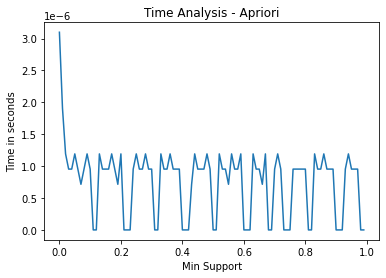

In [42]:
time_req = []
min_supp = []
for y in [float(i)/100 for i in range(100)]:
    start = time.time()
    association_rules = ap(transactions = dataset, min_support=y, min_confidence=0.5, min_lift=3)
    min_supp.append(y)
    time_req.append(time.time()-start)
    
print(time_req)
    
plt.ylabel('Time in seconds')
plt.xlabel('Min Support')
plt.title('Time Analysis - Apriori')
plt.plot(min_supp,time_req)

In [25]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

In [26]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

In [27]:
rules = rules.drop(['leverage', 'conviction'], axis = 1)
rules['count'] = rules['support']*5
rules['count'] = rules['count'].astype('int64')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,count
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,4
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,4
2,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,3
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,3
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,3
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,3
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,3
7,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,3
8,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,3
9,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,3


In [28]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
2,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
3,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Eggs),"(Kidney Beans, Onion)",0.8,0.6,0.6,0.75,1.25,0.12,1.6
5,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf


In [29]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,1
2,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,2
3,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,2
4,(Eggs),"(Kidney Beans, Onion)",0.8,0.6,0.6,0.75,1.25,0.12,1.6,1
5,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf,1


In [30]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
3,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf,2


# FP Growth

In [31]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]


In [32]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [33]:
print(te_ary)

[[False False False  True False  True  True  True  True False  True]
 [False False  True  True False  True False  True  True False  True]
 [ True False False  True False  True  True False False False False]
 [False  True False False False  True  True False False  True  True]
 [False  True False  True  True  True False False  True False False]]


In [41]:
start = time.time()
fpgrowth(df, min_support=0.6)
end = time.time()

print("Time required", end - start)

Time required 0.004133939743041992


In [35]:
start = time.time()
fpgrowth(df, min_support=0.6, use_colnames=True)
end = time.time()

print("Time required", end - start)

Time required 0.0035851001739501953


In [36]:
fpmax(df, min_support=0.5, use_colnames=True)

,support,itemsets
0,0.6,"(Kidney Beans, Milk)"
1,0.6,"(Kidney Beans, Eggs, Onion)"
2,0.6,"(Kidney Beans, Yogurt)"


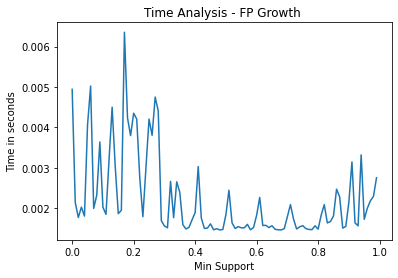

In [44]:
time_req = []
min_supp = []
for y in [float(i)/100 for i in range(100)]:
    start = time.time()
    association_rules = fpgrowth(df, min_support=0.6)
    min_supp.append(y)
    time_req.append(time.time()-start)
    
    
plt.ylabel('Time in seconds')
plt.xlabel('Min Support')
plt.title('Time Analysis - FP Growth ')
plt.plot(min_supp,time_req)

## Advantages of FP Growth over Apriori

In [37]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [38]:
from mlxtend.frequent_patterns import apriori

%timeit -n 100 -r 10 apriori(df, min_support=0.6)

4.94 ms ± 392 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [39]:
%timeit -n 100 -r 10 apriori(df, min_support=0.6, low_memory=True)

5.28 ms ± 420 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [40]:
from mlxtend.frequent_patterns import fpgrowth

%timeit -n 100 -r 10 fpgrowth(df, min_support=0.6)

2.23 ms ± 392 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
